In [116]:
import datetime
import json 


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import wandb

In [119]:
# get 
api = wandb.Api()
runs = api.runs("graham/falcon_tcav")

In [5]:
run_history = run.history()

In [6]:
run_history.columns

Index(['sensitivity', 'cav', 'grad_vals', 'sensitivity_score', '_step',
       '_runtime', 'model_type', 'layern_n', 'layern_type', '_timestamp'],
      dtype='object')

In [120]:
run = list(filter(lambda x: "lstm_cnn" in x.tags and "tcav" in x.tags and x.state == "finished", runs))
print(f"==> these are the runs: {run}")
run = run[0]
run_history = run.history()
run_start = datetime.datetime.fromtimestamp(run_history["_timestamp"][0])
print(f"run started: {run_start}")

==> these are the runs: [<Run graham/falcon_tcav/1qf99l09 (finished)>]
run started: 2020-10-08 12:47:57


In [122]:
runs = api.runs("graham/falcon_tcav")
MODEL_TYPES=["base", "adv", "cnn", "lstm", "lstm_cnn", "cnn_lstm"]
model_type = MODEL_TYPES[1]

def make_chart_sensitivity(model_type, title=None):

    run = list(filter(lambda x: model_type in x.tags and "tcav" in x.tags and x.state == "finished", runs))[0]
    run_history = run.history()
    scores = []
    for row_idx, row in run_history.iterrows():
        scores.append({"layer": row.layer_n, "score": row.sensitivity_score[0], "score_n": 0})
        scores.append({"layer": row.layer_n, "score": row.sensitivity_score[1], "score_n": 1})

    df=pd.DataFrame(scores)
    
    
    ax = sns.catplot(data=df, kind="bar", x="layer", y="score", hue="score_n")
    if title:
        plt.title(title)
        
    return ax

# ax = make_chart_sensitivity(model_type=MODEL_TYPES[2])

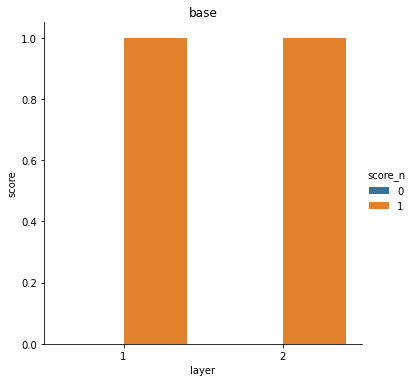

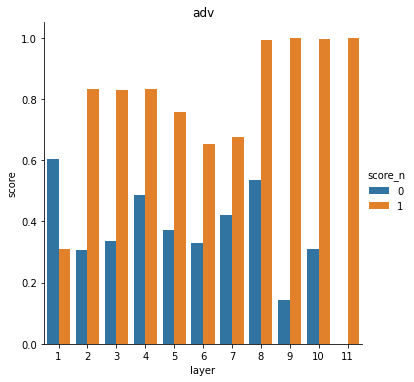

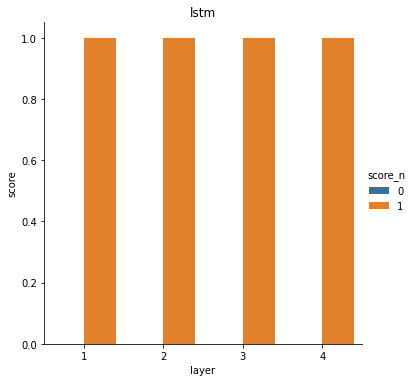

In [69]:
for idx, model_str in enumerate(MODEL_TYPES):
    make_chart_sensitivity(model_type=MODEL_TYPES[idx], title=model_str)